In [1]:
from model import PModel

import numpy as np
from matplotlib import pyplot as plt

#Global parameters
p1 = 0.3        #Probability of first-order epistatic interaction
p2 = 0.3        #Probability of second-order epistatic interaction
sigma1 = 0.3    #Standard deviation for first-order epistasis
sigma2 = 0.3    #Standard deviation for second-order epistasis

In [20]:
def pareto_front(model, n_steps=100):
	cost = np.zeros(n_steps)
	res = np.linspace(0, np.max(1-model.B), n_steps)

	for i, val in enumerate(res):
		cost[i] = np.max((model.F)[1-model.B >= val])
		
	return (res, cost)

def sim_array(n_loci, n_sims, n_steps=100, epi=0):
	model = PModel(n_loci, np.zeros(n_loci), np.zeros(n_loci))
	cost_grid = np.zeros((n_sims, n_steps))

	for i in range(n_sims):
		cost = np.random.exponential(0.1, n_loci)
		res = np.random.exponential(0.1, n_loci)
		model.update_loci(res, cost)

		if epi == 1:
			model.add_epistasis(2, p1, sigma1)
		elif epi ==	2:
			model.add_epistasis(2, p1, sigma1)
			model.add_epistasis(3, p2, sigma2)

		model.normalize()

		res, cost = pareto_front(model)
		cost_grid[i,:] = cost

	cost_avg = np.average(cost_grid, axis=0)
	cost_std = np.std(cost_grid, axis=0)

	return cost_avg, cost_std

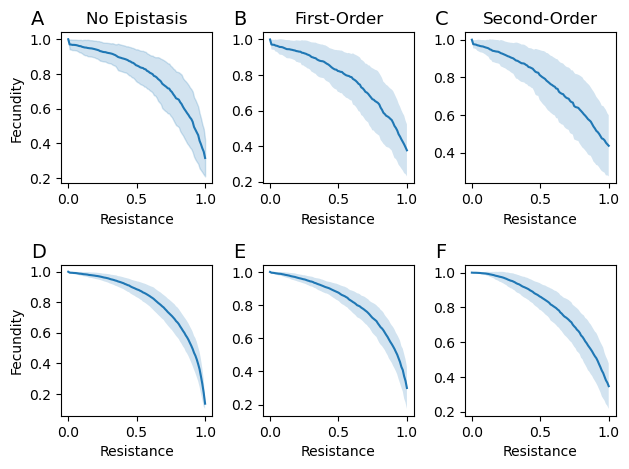

In [24]:
fig, ax = plt.subplots(ncols=3, nrows=2)

n_loci = 5
costs, err = sim_array(n_loci, 100)
costs_epi1, err_epi1 = sim_array(n_loci, 100, epi=1)
costs_epi2, err_epi2 = sim_array(n_loci, 100, epi=2)

res_pts = np.linspace(0, 1, 100)

ax[0,0].set_title('No Epistasis')
ax[0,1].set_title('First-Order')
ax[0,2].set_title('Second-Order')

ax[0,0].plot(res_pts, costs)
ax[0,0].fill_between(res_pts, costs-err, costs+err, alpha=0.2, color='tab:blue')
ax[0,0].set_xlabel('Resistance')
ax[0,0].set_ylabel('Fecundity')

ax[0,1].plot(res_pts, costs_epi1)
ax[0,1].fill_between(res_pts, costs_epi1-err_epi1, costs_epi1+err_epi1, alpha=0.2)
ax[0,1].set_xlabel('Resistance')

ax[0,2].plot(res_pts, costs_epi2)
ax[0,2].fill_between(res_pts, costs_epi2-err_epi2, costs_epi2+err_epi2, alpha=0.2)
ax[0,2].set_xlabel('Resistance')

n_loci = 13
costs, err = sim_array(n_loci, 100)
costs_epi1, err_epi1 = sim_array(n_loci, 100, epi=1)
costs_epi2, err_epi2 = sim_array(n_loci, 100, epi=2)

ax[1,0].plot(res_pts, costs)
ax[1,0].fill_between(res_pts, costs-err, costs+err, alpha=0.2)
ax[1,0].set_xlabel('Resistance')
ax[1,0].set_ylabel('Fecundity')

ax[1,1].plot(res_pts, costs_epi1)
ax[1,1].fill_between(res_pts, costs_epi1-err_epi1, costs_epi1+err_epi1, alpha=0.2)
ax[1,1].set_xlabel('Resistance')

ax[1,2].plot(res_pts, costs_epi2)
ax[1,2].fill_between(res_pts, costs_epi2-err_epi2, costs_epi2+err_epi2, alpha=0.2)
ax[1,2].set_xlabel('Resistance')

ax[0,0].annotate("A", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[0,1].annotate("B", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[0,2].annotate("C", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[1,0].annotate("D", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[1,1].annotate("E", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[1,2].annotate("F", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)

plt.tight_layout()